## Set up model

Set up a Pytorch model (you may find it helpful to keep it simple and fast to train). Train on an intermediate-sized dataset (if you are using MNIST, say 2000 or 4000).

Plot the loss and error rate as a function of training epochs.

Ensure that your model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this (preferably higher than your target error-rate).

In [4]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormaps

%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F  # this includes tensor functions that we can use in backwards pass
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
import torch.optim as optim 

In [5]:
transform_list = transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean=[0.0], std=[1.0,]) ] )

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_list)

mnist_trainset_small =  [ mnist_trainset[i] for i in range(0,2000) ] 

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_list)

len(mnist_testset)
len(mnist_trainset)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



60000

In [6]:
class NN1(nn.Module):
    def __init__(self):
        super(NN1, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 64),  
            nn.ReLU(),            # Add non-linearity
            nn.Linear(64, 64),    # Additional layer
            nn.ReLU(),            # Add non-linearity
            nn.Linear(64, 10)     
        )
    
    def forward(self, x):
        x = self.layers(x)
        return x


In [7]:
model = NN1()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 30

trainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader( mnist_testset, batch_size=32, shuffle=True)


Epoch 1, Train Loss: 1.6745, Train Error Rate: 0.4470, Validation Loss: 0.8747, Validation Error Rate: 0.2257
Epoch 2, Train Loss: 0.6296, Train Error Rate: 0.1605, Validation Loss: 0.5044, Validation Error Rate: 0.1403
Epoch 3, Train Loss: 0.4156, Train Error Rate: 0.1160, Validation Loss: 0.4336, Validation Error Rate: 0.1245
Epoch 4, Train Loss: 0.3208, Train Error Rate: 0.0835, Validation Loss: 0.3964, Validation Error Rate: 0.1173
Epoch 5, Train Loss: 0.2710, Train Error Rate: 0.0715, Validation Loss: 0.3755, Validation Error Rate: 0.1077
Epoch 6, Train Loss: 0.2258, Train Error Rate: 0.0620, Validation Loss: 0.3786, Validation Error Rate: 0.1104
Epoch 7, Train Loss: 0.1951, Train Error Rate: 0.0525, Validation Loss: 0.3811, Validation Error Rate: 0.1131
Epoch 8, Train Loss: 0.1764, Train Error Rate: 0.0470, Validation Loss: 0.3752, Validation Error Rate: 0.1102
Epoch 9, Train Loss: 0.1591, Train Error Rate: 0.0470, Validation Loss: 0.3597, Validation Error Rate: 0.1070
Epoch 10, 

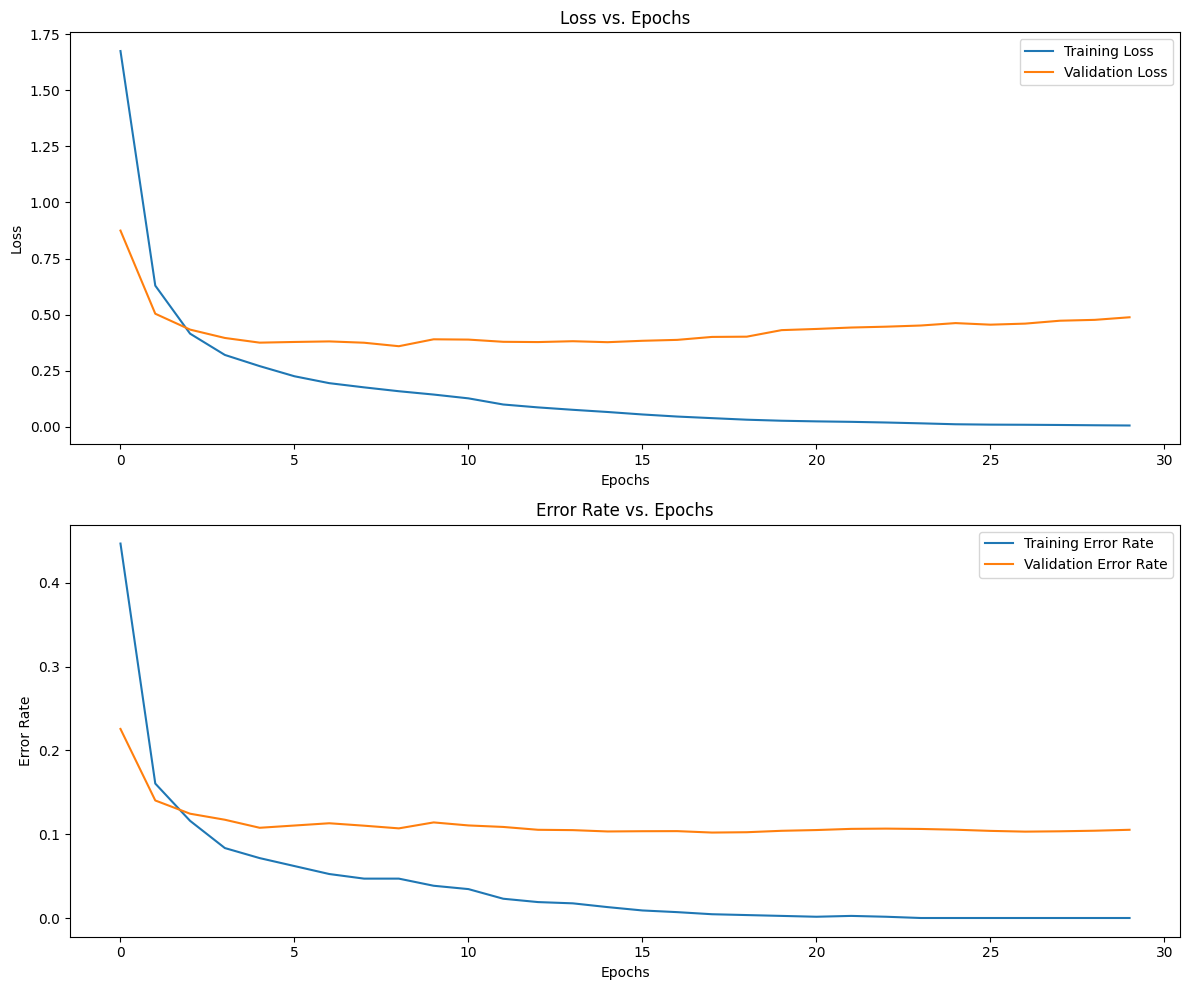

In [8]:
def train_model(model, criterion, optimizer, trainloader, testloader, epochs):
    # Initialize lists to store metrics
    train_losses = []
    train_error_rates = []
    val_losses = []
    val_error_rates = []

    for epoch in range(epochs):
        # Set the model to training mode
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0
        for images, labels in trainloader:
            # Clear gradients
            optimizer.zero_grad()
            # Forward pass
            output = model(images)
            # loss
            loss = criterion(output, labels)
            # Backpropagation
            loss.backward()
            # Update model parameters
            optimizer.step()
            
            # Track loss and accuracy
            train_loss += loss.item() * images.size(0)
            _, predicted = torch.max(output.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        # Calculate training loss and error rate
        train_loss /= len(trainloader.dataset)
        train_losses.append(train_loss)
        train_error = 1 - train_correct / train_total
        train_error_rates.append(train_error)

        # Validation phase
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in testloader:
                output = model(images)
                loss = criterion(output, labels)
                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(output.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        
        val_loss /= len(testloader.dataset)
        val_losses.append(val_loss)
        val_error = 1 - val_correct / val_total
        val_error_rates.append(val_error)

        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Error Rate: {train_error:.4f}, Validation Loss: {val_loss:.4f}, Validation Error Rate: {val_error:.4f}')
    
    
    # Plotting the results
    plt.figure(figsize=(12, 10))

    # Loss plot
    plt.subplot(2, 1, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Error rate plot
    plt.subplot(2, 1, 2)
    plt.plot(train_error_rates, label='Training Error Rate')
    plt.plot(val_error_rates, label='Validation Error Rate')
    plt.title('Error Rate vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Error Rate')
    plt.legend()

    plt.tight_layout()
    plt.show()


train_model(model, criterion, optimizer, trainloader, testloader, epochs)


### 2.  Regularisation experiment:  ***12 marks***

Now select a type of regularisation (which may be L2, or dropout) and train your initial model with different amounts of regularisation.

A small amount of regularisation may improve the validation set performance of your overfitted model; too much regularisation may make performance on the validation set worse.

Train your model multiple times, applying different amounts of regularisation, and plot a graoph showing the effect of different amounts of regularisation.

Plot the amount of regularisation along the x axis, and the validation set performance (loss/error-rate) on the y axis.  How does regularisation affect the performance of your initial network, and what is the optimal amount?

Epoch 1, Train Loss: 1.6563, Train Error Rate: 0.4780, Validation Loss: 0.8654, Validation Error Rate: 0.2228
Epoch 2, Train Loss: 0.6100, Train Error Rate: 0.1655, Validation Loss: 0.5068, Validation Error Rate: 0.1476
Epoch 3, Train Loss: 0.3997, Train Error Rate: 0.1120, Validation Loss: 0.4456, Validation Error Rate: 0.1340
Epoch 4, Train Loss: 0.3192, Train Error Rate: 0.0920, Validation Loss: 0.3915, Validation Error Rate: 0.1152
Epoch 5, Train Loss: 0.2640, Train Error Rate: 0.0690, Validation Loss: 0.3911, Validation Error Rate: 0.1124
Epoch 6, Train Loss: 0.2280, Train Error Rate: 0.0595, Validation Loss: 0.4128, Validation Error Rate: 0.1169
Epoch 7, Train Loss: 0.2055, Train Error Rate: 0.0560, Validation Loss: 0.4305, Validation Error Rate: 0.1204
Epoch 8, Train Loss: 0.1733, Train Error Rate: 0.0465, Validation Loss: 0.3798, Validation Error Rate: 0.1095
Epoch 9, Train Loss: 0.1475, Train Error Rate: 0.0400, Validation Loss: 0.3867, Validation Error Rate: 0.1102
Epoch 10, 

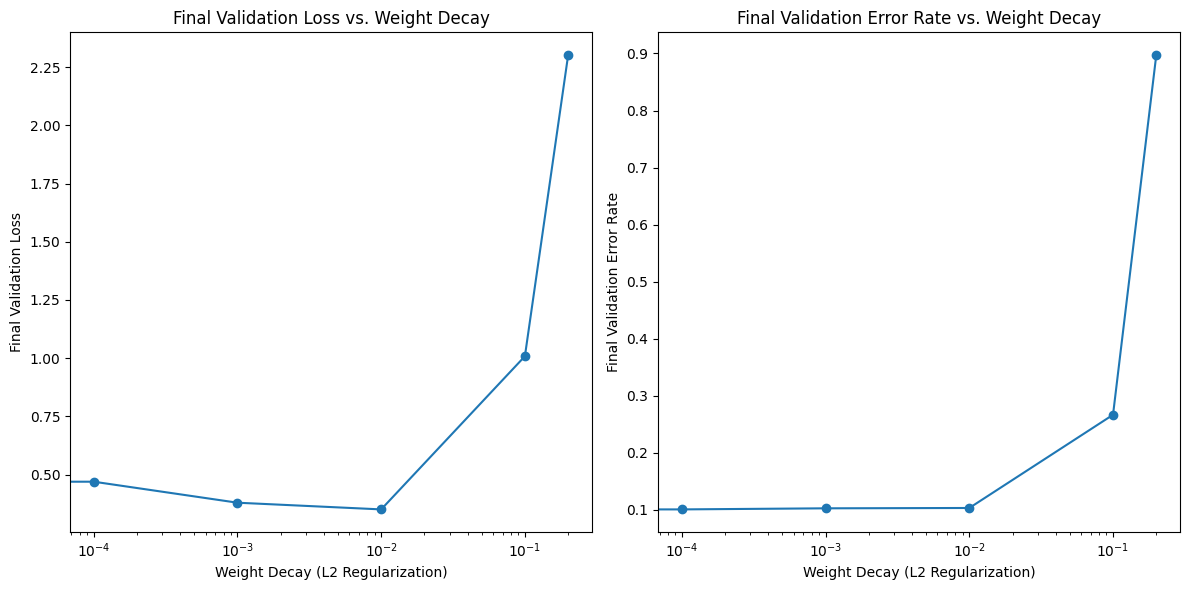

In [9]:
# Define a set of weight decay values for L2 regularization
weight_decays = [0.0, 0.0001, 0.001, 0.01, 0.1, 0.2]
validation_losses = []
validation_error_rates = []

for wd in weight_decays:
   
    model = NN1()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=wd)  
    
    # Initialization
    train_losses = []
    train_error_rates = []  
    val_losses = []
    val_error_rates = []

    # Training loop
    for epoch in range(epochs):
        model.train() 
        train_loss = 0
        train_correct = 0
        train_total = 0
        for images, labels in trainloader:
            optimizer.zero_grad()  
            output = model(images)  
            loss = criterion(output, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update model parameters
            
            train_loss += loss.item() * images.size(0)  # Track loss
            _, predicted = torch.max(output.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_loss /= len(trainloader.dataset)
        train_losses.append(train_loss)
        train_error = 1 - train_correct / train_total
        train_error_rates.append(train_error)  # Append training error rate

        # Validation phase
        model.eval()  # Set the model to evaluation mode
        val_loss = 0
        val_correct = 0
        val_total = 0
        with torch.no_grad(): 
            for images, labels in testloader:
                output = model(images)
                loss = criterion(output, labels)
                val_loss += loss.item() * images.size(0)  
                _, predicted = torch.max(output.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss /= len(testloader.dataset)
        val_losses.append(val_loss)
        val_error = 1 - val_correct / val_total
        val_error_rates.append(val_error) 


        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Error Rate: {train_error:.4f}, Validation Loss: {val_loss:.4f}, Validation Error Rate: {val_error:.4f}')

    validation_losses.append(val_losses[-1])
    validation_error_rates.append(val_error_rates[-1])
# Now plot the results to show the impact of weight decay on validation loss and error rate
plt.figure(figsize=(12, 6))

# Plot for validation losses
plt.subplot(1, 2, 1)
plt.plot(weight_decays, validation_losses, marker='o')
plt.xscale('log')
plt.xlabel('Weight Decay (L2 Regularization)')
plt.ylabel('Final Validation Loss')
plt.title('Final Validation Loss vs. Weight Decay')

# Plot for validation error rates
plt.subplot(1, 2, 2)
plt.plot(weight_decays, validation_error_rates, marker='o')
plt.xscale('log')
plt.xlabel('Weight Decay (L2 Regularization)')
plt.ylabel('Final Validation Error Rate')
plt.title('Final Validation Error Rate vs. Weight Decay')

plt.tight_layout()
plt.show()


### 3.  Learning curve experiment

Now train your model (with the amount of regularisation you selected) on different amounts of training data.

Plot the performance (loss/error-rate) of the model on the validation set against the size of the training set.
This is typically best done on a log-log plot.

Describe the approximate relationship between the training set size and loss / error-rate.  Does the network performance appear to improve as some power of the amount of data in the training set?  If so, by what power ?

For example, a very good rate of improvement is for error-rate to be proportional to $\dfrac{1}{\sqrt{n}}$ where $n$ is the training set size.  For your model, the rate of improvement of validation error with training set size may not be as fast as this (or it may, who knows?)  The aim of this exercise is to find out what it actually is.

Epoch 30, Train Loss: 0.1933, Train Error Rate: 0.0100, Validation Loss: 1.0571, Validation Error Rate: 0.3463
Epoch 30, Train Loss: 0.0789, Train Error Rate: 0.0000, Validation Loss: 0.7860, Validation Error Rate: 0.2501
Epoch 30, Train Loss: 0.0896, Train Error Rate: 0.0000, Validation Loss: 0.5693, Validation Error Rate: 0.1800
Epoch 30, Train Loss: 0.1335, Train Error Rate: 0.0160, Validation Loss: 0.4732, Validation Error Rate: 0.1468
Epoch 30, Train Loss: 0.1749, Train Error Rate: 0.0345, Validation Loss: 0.3466, Validation Error Rate: 0.1037
Epoch 30, Train Loss: 0.1912, Train Error Rate: 0.0434, Validation Loss: 0.2745, Validation Error Rate: 0.0813
Epoch 30, Train Loss: 0.2158, Train Error Rate: 0.0548, Validation Loss: 0.2460, Validation Error Rate: 0.0639


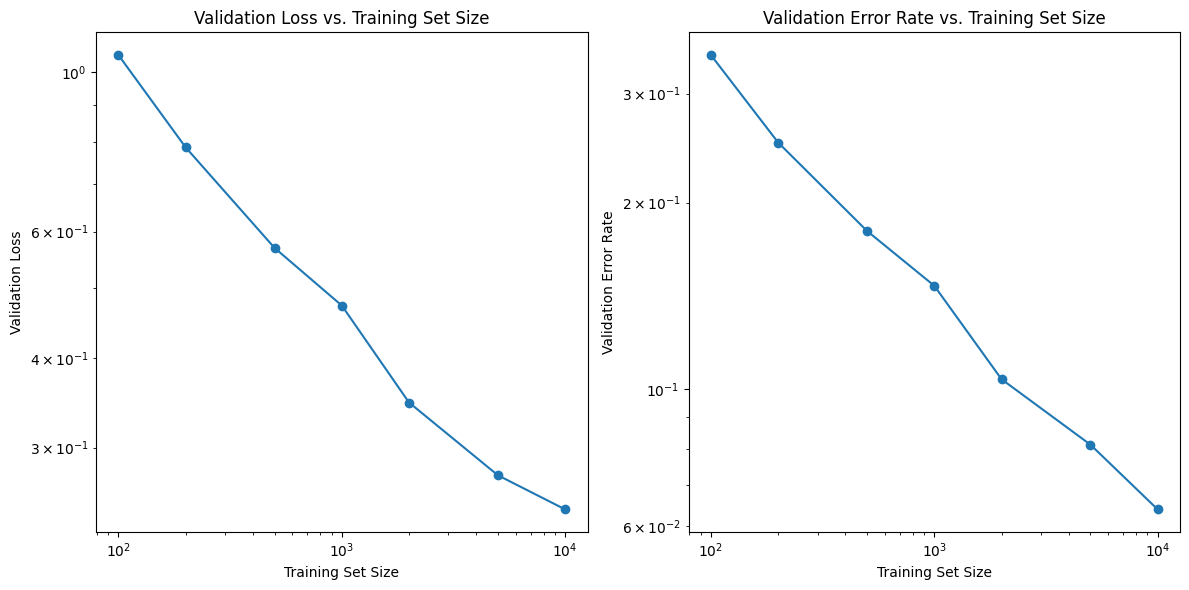

[0.3463 0.2501 0.18   0.1468 0.1037 0.0813 0.0639]


In [10]:
training_set_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]



val_losses = []
val_error_rates = []

weight_decay = 0.01
for size in training_set_sizes:
    mnist_trainset_small =  [ mnist_trainset[i] for i in range(0,size) ] 
    
    trainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=32, shuffle=True)
    testloader = torch.utils.data.DataLoader( mnist_testset, batch_size=32, shuffle=True)

    
    # Initialize your model
    model = NN1()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)
    
    for epoch in range(epochs):
        model.train()  # Set the model to training mode
        train_loss = 0
        train_correct = 0
        train_total = 0
        for images, labels in trainloader:
            optimizer.zero_grad()  # Clear gradients from the previous step
            output = model(images)  # Forward pass
            loss = criterion(output, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update model parameters
            
            train_loss += loss.item() * images.size(0)  # Track loss
            _, predicted = torch.max(output.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_loss /= len(trainloader.dataset)
        train_losses.append(train_loss)
        train_error = 1 - train_correct / train_total
        train_error_rates.append(train_error)  

        # Validation phase
        model.eval()  # Set the model to evaluation mode
        val_loss = 0
        val_correct = 0
        val_total = 0
        with torch.no_grad(): 
            for images, labels in testloader:
                output = model(images)
                loss = criterion(output, labels)
                val_loss += loss.item() * images.size(0) 
                _, predicted = torch.max(output.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
    

    val_loss /= len(testloader.dataset)
    val_losses.append(val_loss)
    val_error = 1 - val_correct / val_total
    val_error_rates.append(val_error)
    
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Error Rate: {train_error:.4f}, Validation Loss: {val_loss:.4f}, Validation Error Rate: {val_error:.4f}')


       

# Convert lists to numpy arrays for log-log plotting
training_set_sizes = np.array(training_set_sizes)
val_losses = np.array(val_losses)
val_error_rates = np.array(val_error_rates)

# Plot the validation performance against training set size
plt.figure(figsize=(12, 6))


# Log-log plot for validation loss
plt.subplot(1, 2, 1)
plt.loglog(training_set_sizes, val_losses, marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Training Set Size')

# Log-log plot for validation error rate
plt.subplot(1, 2, 2)
plt.loglog(training_set_sizes, val_error_rates, marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Validation Error Rate')
plt.title('Validation Error Rate vs. Training Set Size')

plt.tight_layout()
plt.show()

mod1 = val_error_rates
print (mod1)

In [11]:
mod1 = val_error_rates
print(mod1)

[0.3463 0.2501 0.18   0.1468 0.1037 0.0813 0.0639]


### 4. Second model

Devise what you believe to be a better neural network architecture for the problem (e.g. for MNIST you might use a fully-connected network for your initial model, and then try a convolutional net for your second model).

Repeat sections 2 (regularisation experiment), and determine whether it has better validation set performance than the first model, for an intermediate size of training set (e.g. 2000 or 4000 for the MNIST data).

Repeat section 3. Does your model have a different learning curve from the first? Plot the learning curves for the first and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training set size for your second model?  

In [12]:
class NN_convolutional1(nn.Module):
    
    def __init__(self): 
        super(NN_convolutional1, self).__init__()
        # Convolutional layers
        self.layers = nn.Sequential( 
            nn.Conv2d(1, 12, kernel_size=3, padding=1),
            nn.ReLU(), 
            nn.Conv2d(12, 12, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(12, 2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(28*28*2, 12),  # Adjust the input features to match the flattened size
            nn.ReLU(), 
            nn.Linear(12, 10)  # Output 10 classes for MNIST
        )
    
    def forward(self, x):
        x = self.layers(x)
        return x

# Create an instance of the model
model = NN_convolutional1()


Epoch 1, Train Loss: 1.0358, Train Error Rate: 0.3429, Validation Loss: 0.5050, Validation Error Rate: 0.1519
Epoch 2, Train Loss: 0.4348, Train Error Rate: 0.1291, Validation Loss: 0.4080, Validation Error Rate: 0.1237
Epoch 3, Train Loss: 0.3647, Train Error Rate: 0.1077, Validation Loss: 0.3502, Validation Error Rate: 0.1055
Epoch 4, Train Loss: 0.3100, Train Error Rate: 0.0887, Validation Loss: 0.3276, Validation Error Rate: 0.0959
Epoch 5, Train Loss: 0.2894, Train Error Rate: 0.0875, Validation Loss: 0.3335, Validation Error Rate: 0.1034
Epoch 6, Train Loss: 0.2679, Train Error Rate: 0.0795, Validation Loss: 0.2982, Validation Error Rate: 0.0895
Epoch 7, Train Loss: 0.2550, Train Error Rate: 0.0775, Validation Loss: 0.3035, Validation Error Rate: 0.0915
Epoch 8, Train Loss: 0.2438, Train Error Rate: 0.0752, Validation Loss: 0.2697, Validation Error Rate: 0.0787
Epoch 9, Train Loss: 0.2216, Train Error Rate: 0.0673, Validation Loss: 0.2637, Validation Error Rate: 0.0782
Epoch 10, 

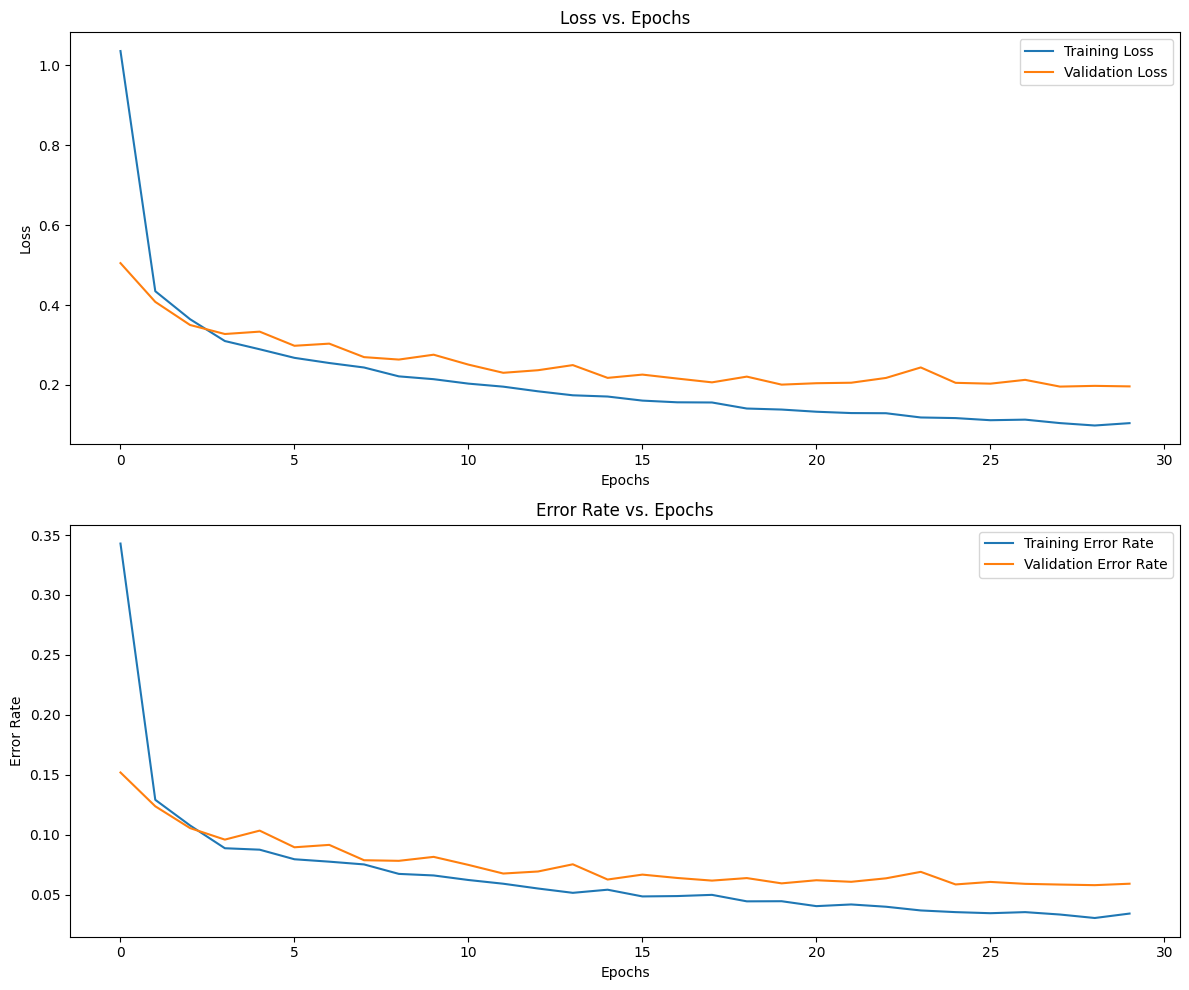

In [17]:
model = NN_convolutional1()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 30

trainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader( mnist_testset, batch_size=32, shuffle=True)

def train_model(model, criterion, optimizer, trainloader, testloader, epochs):
    # Initialize lists to store metrics
    train_losses = []
    train_error_rates = []
    val_losses = []
    val_error_rates = []

    for epoch in range(epochs):
        # Set the model to training mode
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0
        for images, labels in trainloader:
            # Clear gradients
            optimizer.zero_grad()
            # Forward pass
            output = model(images)
            # loss
            loss = criterion(output, labels)
            # Backpropagation
            loss.backward()
            # Update model parameters
            optimizer.step()
            
            # Track loss and accuracy
            train_loss += loss.item() * images.size(0)
            _, predicted = torch.max(output.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        # Calculate training loss and error rate
        train_loss /= len(trainloader.dataset)
        train_losses.append(train_loss)
        train_error = 1 - train_correct / train_total
        train_error_rates.append(train_error)

        # Validation phase
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in testloader:
                output = model(images)
                loss = criterion(output, labels)
                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(output.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        
        val_loss /= len(testloader.dataset)
        val_losses.append(val_loss)
        val_error = 1 - val_correct / val_total
        val_error_rates.append(val_error)

        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Error Rate: {train_error:.4f}, Validation Loss: {val_loss:.4f}, Validation Error Rate: {val_error:.4f}')
    
    # Plotting the results
    plt.figure(figsize=(12, 10))

    # Loss plot
    plt.subplot(2, 1, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Error rate plot
    plt.subplot(2, 1, 2)
    plt.plot(train_error_rates, label='Training Error Rate')
    plt.plot(val_error_rates, label='Validation Error Rate')
    plt.title('Error Rate vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Error Rate')
    plt.legend()

    plt.tight_layout()
    plt.show()


train_model(model, criterion, optimizer, trainloader, testloader, epochs)


Epoch 1, Train Loss: 1.0038, Train Error Rate: 0.3428, Validation Loss: 0.4936, Validation Error Rate: 0.1376
Epoch 2, Train Loss: 0.4042, Train Error Rate: 0.1094, Validation Loss: 0.3128, Validation Error Rate: 0.0873
Epoch 3, Train Loss: 0.2948, Train Error Rate: 0.0796, Validation Loss: 0.2749, Validation Error Rate: 0.0775
Epoch 4, Train Loss: 0.2540, Train Error Rate: 0.0705, Validation Loss: 0.2776, Validation Error Rate: 0.0745
Epoch 5, Train Loss: 0.2261, Train Error Rate: 0.0636, Validation Loss: 0.2330, Validation Error Rate: 0.0668
Epoch 6, Train Loss: 0.2032, Train Error Rate: 0.0553, Validation Loss: 0.2696, Validation Error Rate: 0.0751
Epoch 7, Train Loss: 0.1921, Train Error Rate: 0.0548, Validation Loss: 0.2039, Validation Error Rate: 0.0580
Epoch 8, Train Loss: 0.1764, Train Error Rate: 0.0500, Validation Loss: 0.2248, Validation Error Rate: 0.0627
Epoch 9, Train Loss: 0.1617, Train Error Rate: 0.0465, Validation Loss: 0.2111, Validation Error Rate: 0.0564
Epoch 10, 

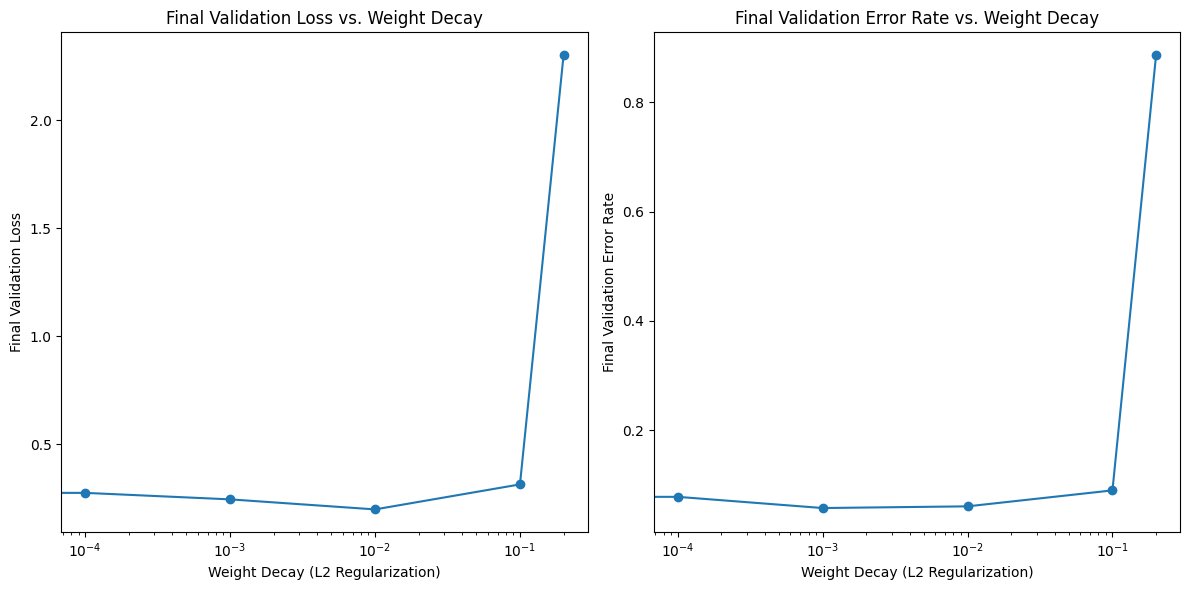

In [18]:

weight_decays = [0.0, 0.0001, 0.001, 0.01, 0.1, 0.2]
validation_losses = []
validation_error_rates = []

for wd in weight_decays:
   
    model = NN_convolutional1()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=wd)  
    
    # Initialization
    train_losses = []
    train_error_rates = []  
    val_losses = []
    val_error_rates = []

    # Training loop
    for epoch in range(epochs):
        model.train() 
        train_loss = 0
        train_correct = 0
        train_total = 0
        for images, labels in trainloader:
            optimizer.zero_grad() 
            output = model(images)  
            loss = criterion(output, labels) 
            loss.backward()  
            optimizer.step()  
            
            train_loss += loss.item() * images.size(0) 
            _, predicted = torch.max(output.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_loss /= len(trainloader.dataset)
        train_losses.append(train_loss)
        train_error = 1 - train_correct / train_total
        train_error_rates.append(train_error)  

        # Validation phase
        model.eval()  
        val_loss = 0
        val_correct = 0
        val_total = 0
        with torch.no_grad(): 
            for images, labels in testloader:
                output = model(images)
                loss = criterion(output, labels)
                val_loss += loss.item() * images.size(0)  
                _, predicted = torch.max(output.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss /= len(testloader.dataset)
        val_losses.append(val_loss)
        val_error = 1 - val_correct / val_total
        val_error_rates.append(val_error)  


        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Error Rate: {train_error:.4f}, Validation Loss: {val_loss:.4f}, Validation Error Rate: {val_error:.4f}')

    validation_losses.append(val_losses[-1])
    validation_error_rates.append(val_error_rates[-1])

plt.figure(figsize=(12, 6))

# Plot for validation losses
plt.subplot(1, 2, 1)
plt.plot(weight_decays, validation_losses, marker='o')
plt.xscale('log')
plt.xlabel('Weight Decay (L2 Regularization)')
plt.ylabel('Final Validation Loss')
plt.title('Final Validation Loss vs. Weight Decay')

# Plot for validation error rates
plt.subplot(1, 2, 2)
plt.plot(weight_decays, validation_error_rates, marker='o')
plt.xscale('log')
plt.xlabel('Weight Decay (L2 Regularization)')
plt.ylabel('Final Validation Error Rate')
plt.title('Final Validation Error Rate vs. Weight Decay')

plt.tight_layout()
plt.show()


Epoch 30, Train Loss: 0.7712, Train Error Rate: 0.2800, Validation Loss: 2.3436, Validation Error Rate: 0.5212
Epoch 30, Train Loss: 1.9340, Train Error Rate: 0.7550, Validation Loss: 2.1035, Validation Error Rate: 0.7823
Epoch 30, Train Loss: 0.0044, Train Error Rate: 0.0000, Validation Loss: 1.6718, Validation Error Rate: 0.1725
Epoch 30, Train Loss: 0.1341, Train Error Rate: 0.0400, Validation Loss: 1.0144, Validation Error Rate: 0.1860
Epoch 30, Train Loss: 0.6380, Train Error Rate: 0.1945, Validation Loss: 0.8863, Validation Error Rate: 0.2682
Epoch 30, Train Loss: 0.0757, Train Error Rate: 0.0268, Validation Loss: 0.2514, Validation Error Rate: 0.0664
Epoch 30, Train Loss: 0.0648, Train Error Rate: 0.0201, Validation Loss: 0.1938, Validation Error Rate: 0.0470


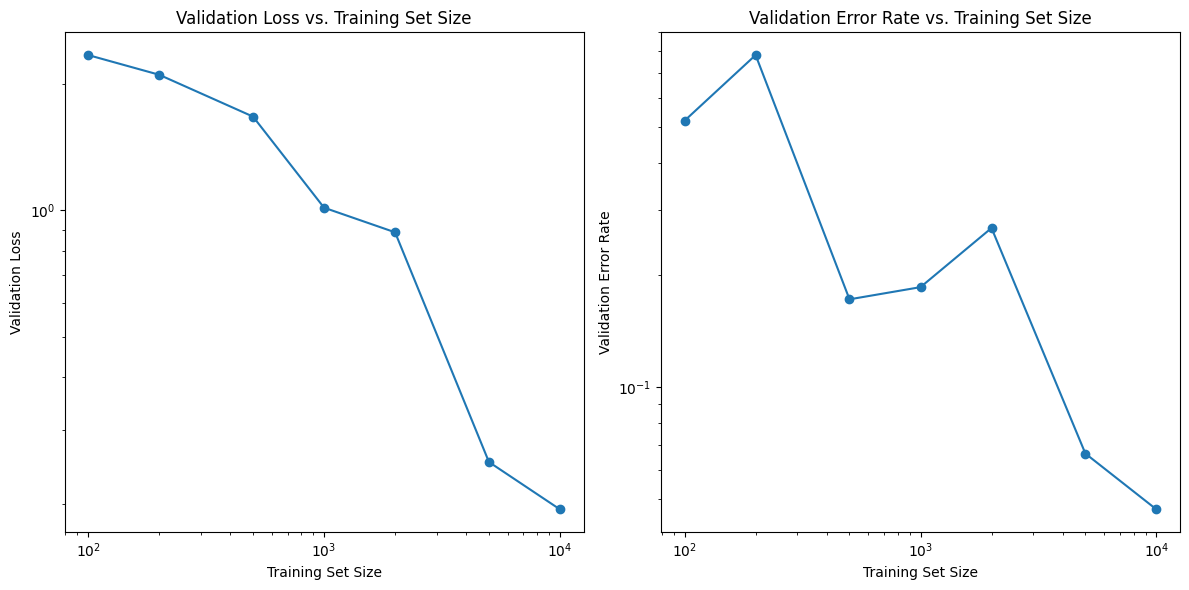

[0.5212 0.7823 0.1725 0.186  0.2682 0.0664 0.047 ]


In [19]:
training_set_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]



val_losses = []
val_error_rates = []

weight_decay = 0.0001
for size in training_set_sizes:
    mnist_trainset_small =  [ mnist_trainset[i] for i in range(0,size) ] 
    
    trainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=32, shuffle=True)
    testloader = torch.utils.data.DataLoader( mnist_testset, batch_size=32, shuffle=True)

    
    # Initialize your model
    model = NN_convolutional1()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)
    
    for epoch in range(epochs):
        model.train() 
        train_loss = 0
        train_correct = 0
        train_total = 0
        for images, labels in trainloader:
            optimizer.zero_grad()  
            output = model(images)  
            loss = criterion(output, labels) 
            loss.backward() 
            optimizer.step() 
            
            train_loss += loss.item() * images.size(0)  
            _, predicted = torch.max(output.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_loss /= len(trainloader.dataset)
        train_losses.append(train_loss)
        train_error = 1 - train_correct / train_total
        train_error_rates.append(train_error)  

        # Validation phase
        model.eval()  
        val_loss = 0
        val_correct = 0
        val_total = 0
        with torch.no_grad():  
            for images, labels in testloader:
                output = model(images)
                loss = criterion(output, labels)
                val_loss += loss.item() * images.size(0)  
                _, predicted = torch.max(output.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
    
    val_loss /= len(testloader.dataset)
    val_losses.append(val_loss)
    val_error = 1 - val_correct / val_total
    val_error_rates.append(val_error)  

    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Error Rate: {train_error:.4f}, Validation Loss: {val_loss:.4f}, Validation Error Rate: {val_error:.4f}')

       

# Convert lists to numpy arrays for log-log plotting
training_set_sizes = np.array(training_set_sizes)
val_losses = np.array(val_losses)
val_error_rates = np.array(val_error_rates)

# Plot the validation performance against training set size
plt.figure(figsize=(12, 6))


# Log-log plot for validation loss
plt.subplot(1, 2, 1)
plt.loglog(training_set_sizes, val_losses, marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Training Set Size')

# Log-log plot for validation error rate
plt.subplot(1, 2, 2)
plt.loglog(training_set_sizes, val_error_rates, marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Validation Error Rate')
plt.title('Validation Error Rate vs. Training Set Size')

plt.tight_layout()
plt.show()

mod2 = val_error_rates
len(mod2)
print(mod2)

In [20]:
mod2 = val_error_rates
len(mod2)
print(mod2)

[0.5212 0.7823 0.1725 0.186  0.2682 0.0664 0.047 ]


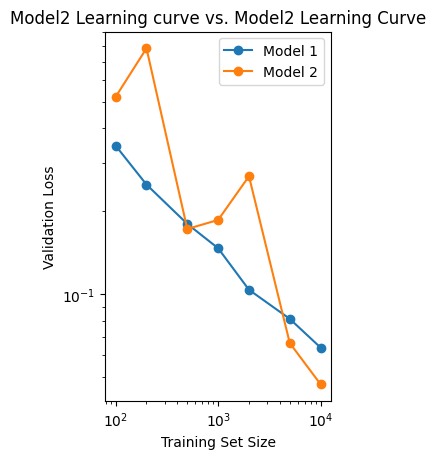

In [21]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.loglog(training_set_sizes, mod1, marker='o', label='Model 1')
plt.loglog(training_set_sizes, mod2, marker='o', label='Model 2')
plt.xlabel('Training Set Size')
plt.ylabel('Validation Loss')
plt.title('Model2 Learning curve vs. Model2 Learning Curve')

plt.legend()
plt.show()


### OBSERVATIONS 

# LEARNING CURVE
With learning curve comparison, model2 performs better than model1. Model1 starts off better but as the data samples get bigger, model2 performs better.

The second model performs better than the first model, 
I used a fully connected NN for my first model and a Convolutional NN for my second model. 

# OVERFITTING MODELS
The first NN overfits much more. This noticed in the generalisation error rate, ie. error on new unseen data. The second model has a lower generalisation error in comparison to the first NN.

# WEIGHT DECAY
The best weight for model1 was 0.01 and model2 is 0.0001

# DIFFERENT MODEL SIZES
We also notice that the more training sample size the better the models performed.


## CONCLUSION

The overfitting in the NN is worse than the overfitting in CNN. The CNN had lower loss and error rate in comparison to the simple NN.
The error rate in CNN has is much lower than the error rate in the NN with different training sizes. Therefore, for this problem, the Convolutional NN is a better NN.

